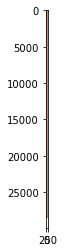

alpha 2.4757281553398056
beta -168.3495145631068


True

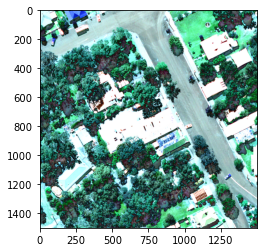

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
path = 'app/image/binalong_translated_06_10.tif'
img = cv2.imread(path)
image = img
# Window name in which image is displayed
window_name = 'Image'

plt.imshow(image)

# Automatic brightness and contrast optimization with optional histogram clipping
def automatic_brightness_and_contrast(image, clip_hist_percent=35):
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)

    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))

    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0

    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1

    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1

    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha

    
    # Calculate new histogram with desired range and show histogram 
    new_hist = cv2.calcHist([gray],[0],None,[256],[minimum_gray,maximum_gray])
    plt.plot(hist)
    plt.plot(new_hist)
    plt.xlim([0,256])
    plt.show()
    
    
    
    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return (auto_result, alpha, beta)




auto_result, alpha, beta = automatic_brightness_and_contrast(image)
print('alpha', alpha)
print('beta', beta)
plt.imshow(auto_result, cmap="gray", vmin=0, vmax=255)
cv2.imwrite('app/image/auto_result.png', auto_result)



True

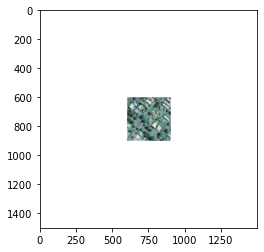

In [42]:
import cv2
from matplotlib import pyplot as plt
path = 'app/image/Cootamundra_2017_02_10cm__6_8.tif'
img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
scale_percent =20

width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)

dsize = (width,height)

output = cv2.resize(img,dsize)
bordersize = 600
border = cv2.copyMakeBorder(
    output,
    top=bordersize,
    bottom=bordersize,
    left=bordersize,
    right=bordersize,
    borderType=cv2.BORDER_CONSTANT,
    value=[255,255,255,255]
)
plt.imshow(output)
cv2.waitKey()
plt.imshow(border)
cv2.imwrite('app/image/resized.png', output)
cv2.imwrite('app/image/borderOutput.png', border)